# Introduction to Time Series and Application on USD-TRY Currency with R Programming

$$\mbox{Ismail GUZEL}$$
$$\mathrm{\textit{iguzel@itu.edu.tr}}$$

## Abstract
We will briefly introduce to the theory of time series. After we decide to whether dataset is stationary or non-stationary, we will build the model for the time series. Then we suggest to use the __log return__ analysis for further the statistical tests and calculations. After splitting the our dataset as training and test set,  we will test our model. Also, By using ARIMA models, we will obtain the prediction of currency for the next year. We will use the R programming language for all applications.

##  Introduction to Time Series

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

A **Time Series** is a set of observations $x_t$, each one being recorded at a specific time $t$. We denote a time series of a variable $X$ as follows
\begin{equation}
X= (X_1,X_2,\dots,X_t,\dots)=\{X_t\}_{t=1,2,\dots}
\end{equation}
Time Series can be deterministic or stochastic and discrete or continuously. We will consider the discrete stochastic time series.
A general approach to time series modeling is as the following:

- **Step1** Plot the series and examine the main features of the graph
   * Trend Component
   * Seasonal Component
   * Anny apparent sharp changes in behavior
   * Any outlying observations
- **Step2** Remove the trend and seasonal compenents to get *stationary residuals*. To achieve this goal it may sometimes be necessary to apply a transformation to the data. (e.g. take the natural logarithm "$ln$").
- **Step3** Choose a model to fit the residuals.
- **Step4** Forecasting the residuals and inverting the transformations described above to arrive forecasts of the original series $\{X_t\}$

The classical decomposition model has the following additive form 
\begin{equation}
X_t=m_t + s_t + Y_t\qquad t=0,1,\dots
\end{equation}
or multiplicative form 
\begin{equation}
X_t=m_ts_tY_t \qquad t=0,1,\dots
\end{equation}
or mixed form,
\begin{equation}
X_t=m_ts_t + Y_t \qquad t=0,1,\dots
\end{equation}
where 
\begin{align}
m_t &: \quad \mbox{is a usually slowly changing function of time as a trend compenent,} \\ 
s_t &:\quad  \mbox{is a periodical function of time as a seasonal compenent,} \\ 
Y_t &: \quad \mbox{is a random noise compenent.} \\ 
\end{align}
Our aim is to estimate and extract the deterministic compenents $m_t$ and $s_t$ in the hope that the residual or noise compenent $Y_t$ will turn out to be a *stationary time series*.

Another approach (Box and Jenkins 1976) is to apply differencing operators repeatedly to the series $\{X_t\}$ until the differenced observations resemble a realization of some *stationary time series*.

## Nonseasonal Model with Trend
There is no seasonality, the model simplify to
\begin{equation}
X_t=m_t + Y_t \qquad t=0,1,\dots
\end{equation}
where $E(X_t)=m_t$, that is we assume that $E(Y_t)=0$. 

* fit a trend
* subtract the fitted trend from data
* you get an approximate stationary time series model for the residuals.

#### Least Square Estimation of Trend
We assume that $m_t=m(t,\mathbf{\beta})$ is a function of time t, such as polynomial of degree $k$, depending on some unknown parameteres $\beta=(\beta_0,\beta_1,\dots,\beta_k)^T$.

We want to find $\beta=(\beta_0,\beta_1,\dots,\beta_k)^T$ by minimizing the function
\begin{equation}
l(\beta)=\sum_{t=1}^{n} (X_t - m(t,\beta))^2
\end{equation}
For example, consider a linear trend model $m(t,\beta)=\beta_0 + \beta_1 t$, after minimizing the following function
\begin{equation}
l(\beta)=\sum_{t=1}^{n} (X_t - \beta_0 - \beta_1)^2
\end{equation}
we obtained the parameters as
\begin{align}
\hat{\beta_0} & = \overline{X_t}-\hat{\beta_1}\overline{t} \\
\hat{\beta_1} & = \frac{\overline{X_t t}-\overline{X_t}\overline{t}}{\overline{t^2}-(\overline{t})^2}
\end{align}
Then, the random noise is estimated as 
\begin{equation}
\hat{y_t}=x_t - \hat{m_t}
\end{equation}
#### Smoothing by a moving average
* *Two sided moving average*: For q nonnegative integer,
\begin{equation}
\hat{m_t}=W_t=\frac{1}{2q+1} \sum_{j=-q}^{q} X_{t-j} \qquad q+1 \leq t \leq n-q
\end{equation}
Then the estimator od the noise is
\begin{equation}
\hat{Y_t}=X_t-W_t
\end{equation}
* *Exponential Smoothing*: For any fixes $\alpha\in[0,1]$, the one-side moving averages 
\begin{equation}
\hat{m_t}=\alpha X_t +(1-\alpha)\hat{m_{t_1}} \qquad \mbox{for}\; t=2,3,\dots\quad \mbox{with} \;\hat{m_1}=X_1
\end{equation}
or recursively
\begin{equation}
\hat{m_t}=\sum_{j=0}^{t-2} \alpha(1-\alpha)^j X_{t-j} + (1-\alpha)^{t-1}X_1
\end{equation}
is a weighted moving average of $X_t,X_{t-1},\dots$ with weights descending exponentially.


The process $W_t$ is a linear function (**linear filter**) of random variables $X_t$. In general, it may be written as
\begin{equation}
W_t=\sum_{j=-\infty}^{\infty} a_jX_{t+j}
\end{equation}
where
\begin{equation}
a_j= \left\{
\begin{array}{ll}
\frac{1}{2q+1} & \quad \mbox{for} \quad -q\leq j\leq q,\\
0 & \quad \mbox{for} \quad |j|>q.
\end{array}\right.
\end{equation}


The set of $\{a_j\}$ is called a linear filter. The following filters are often applied:
* $\{a_j\}$ being successive terms in the expansion $(\frac{1}{2}+\frac{1}{2})^{2q}$. For $q=1$, we get
\begin{equation}
\{a_j\}=(\frac{1}{4},\frac{1}{2},\frac{1}{4}) \mbox{for} \quad j=-1,0,1.
\end{equation}

For large $q$ the weights approximate to a normla curve.
* Spencer's 15-point moving average. Here $q=7$ and the weights are 
\begin{equation}
\{a_j\}= \frac{1}{320}(-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, ... ,-3)
\end{equation}

* Henderson's moving average for q=4
\begin{equation}
\{a_j\}= (-.041, -.010, -.119, .267, .330, .267, -.119, -.010, -.041)
\end{equation}

Sometimes we need to apply filters more than one to get a stationary time series.

## Differencing Method

For **the trend compenent**, we define the *lag*-1 difference operator $\nabla$ by 
\begin{equation}
\nabla X_t=X_t - X_{t-1}=(1-B)X_t
\end{equation}
where $B$ is the backward shift operator $BX_t=X_{t-1}$ with 
\begin{equation}
\nabla^kX_t=\nabla(\nabla^{k-1}X_{t}) \qquad \nabla^0X_t=X_t
\end{equation}
For example, 
\begin{align}
\nabla^2X_t & = \nabla(\nabla X_t)=(1-B)(1-B)X_t = (1-2B-B^2)X_t\\
& = X_t-2X_{t-1}+ X_{t-2}
\end{align}


For **the seasonal compenent**, we define the *lag*-d differencing operator by
\begin{equation}
\nabla_d X_t = X_t - X_{t-d} = (1-B^d)X_t
\end{eqaution}
Applying the *lag*-d operator to the classical decomposition model, we obtain

\begin{align}
\nabla_d X_t & = (m_t + s_t + Y_t)- ( m_{t-d} + s_{t-d} + Y_{t-d} )
 & = m_t - m_{t-d} + Y_t - Y_{t-d}.
\end{align}

This removes the seasonal effect. Then to remove trend we may apply the one of the methods described above. For example, *lag*-1 difference operator $\nabla$.


## Method presented by Brockwell and Davis (2016) 
To obtain a stationary time series, 
- Take natural logarithm of time series
- Apply the operator $\nabla^2$ to the series.(usually 2 step)

Classical Decomposition  Model

\begin{equation}
X_t = m_t + s_t + Y_t  \qquad \mbox{for}\; t=1,2,\dots,n
\end{equation}
where $E(Y_t)=0$ $s_{t+d}=s_t$ and $\sum_{j=1}^{d} s_j =0$

To estimate trend compenent, d is period

If d is even, $d=2q$
\begin{equation}
\hat{m_t}=\frac{1}{d}(\frac{1}{2}X_{t-q}+ X_{t-q+1} + \cdots + X_{t-q-1} + \frac{1}{2}X_{t+q}) \quad q<t<n-q
\end{equation}
If d is odd, $d=2q+1$,
\begin{equation}
\hat{m_t}=\frac{1}{2q+1}\sum_{j=-q}^{q}X_{t-j} \qquad q+1\leq t \leq n-q 
\end{equation}

To estimate the seasonal, for each $k=1,\dots,d$ the average deviations $w_k$,
\begin{equation}
w_k = x_{k+jd}-\hat{m_{k+jd}} \qquad q< k+jd \leq n-q
\end{equation}


\begin{equation}
\hat{s_k}=w_k -\frac{1}{d}\sum_{i=1}^{d} w_i \qquad k=1,\dots, d. \qquad\qquad \mbox{and} \quad \hat{s_k}=\hat{s_{k-d}} \quad k>d
\end{equation}
After we get the deseasonalized variables, again we estimate the trend compenent $\hat{m_t}$
Finally, we can find the noise compenent $Y_t= x_t-\hat{m_t}-\hat{s_t}$

## Stationary Time Series Models

A time series is a sequence of random variables $\{X_t\}_{t=1,2,\dots}$, hence it is natural to ask about distributions of these random variables. We consider first and second order moments of the joint distributions,i.e.
\begin{equation}
E(X_t)\quad \mbox{and}\quad E(X_{t+\tau}X_t) \quad \mbox{for  } t=1,2,\dots \quad \tau=0,1,2\dots
\end{equation}
and examine properties of the time series which depend on these.

Now, we are going to introduce some definiton which we need


Time series : ${X_t}$  for $t=0, \pm 1, \pm 2, \dots$

Time shifted series : $X_{t+\tau}$ for $t=0, \pm 1, \pm 2, \dots$ and $\tau=0,1,2\dots$.


**The covariance of $X$ and $Y$**
\begin{equation}
\mbox{cov}(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]=E[XY]-E[X]E[Y]
\end{equation}

**The stationary time series**
A time series $\{X_t\}$ is called *weakly stationary* or just *stationary* if
- E$(X_t)=\mu_{X_t}=\mu<\infty$
- $\gamma(X_{t+\tau},X_t)=\gamma_{\tau}$

**The autocovariance function (ACVF)**
\begin{equation}
\gamma(\tau)=\gamma_{X}({\tau})=\gamma(X_{t+\tau},X_t)=\mbox{cov}(X_{t+\tau},X_t), \quad \mbox{for all indexes $t$ and lags $\tau$}.
\end{equation}

**The autocorrelation function (ACF)**
\begin{equation}
\rho_{X}(\tau)=\frac{\gamma_X(\tau)}{\gamma_X(0)}=\mbox{corr}(X_{t+\tau},X_t) \quad \forall \tau,t.
\end{equation}

**iid noise**(independent identically distributed)

\begin{equation}
\{X_t\} \sim IID(0,\sigma^2)
\end{equation}

**White noise** ($\{X_t\}$  uncorrelated sequence)

\begin{equation}
\{X_t\}\sim WN(0, \sigma^2)
\end{equation}

**The sample autocovariance function**

\begin{equation}
\hat{\gamma}(\tau)=\frac{1}{n}\sum_{t=1}^{n-|\tau|}(x_t-\bar{x})(x_{t+|\tau|}-\bar{x}),\quad -n< \tau < n
\end{equation}

where

\begin{equation}
\bar{x}=\frac{1}{n} \sum_{t=1}^{n} x_t
\end{equation}

**The sample autocorrelation function**

\begin{equation}
\hat{\rho}(\tau)=\frac{\hat{\gamma}(\tau)}{\hat{\gamma}(0)}, \quad -n < \tau < n
\end{equation}


**The Partial Autocorrelation Function (PACF)**

The autocorrelation function of a zero-mean stationary time series $\{X_t\}_{t=0,1,\dots}$ is defined as 

\begin{align}
\phi_{11} & =\mbox{corr}(X_1,X_0)=\rho(1) \\
\phi_{\tau\tau} & =\mbox{corr}(X_{\tau} - f(X_{\tau-1},\cdots,X_1) , X_{0} - f(X_{\tau-1},\cdots,X_1))
\end{align}

where minimizes the mean square linear prediction error

\begin{equation}
E(X_{\tau} - f(X_{\tau-1},\cdots,X_1))^2.
\end{equation}

## Moving Average Processes MA(q)

$\{X_t\}$ is a moving average process of order q if 
\begin{equation}
X_t=Z_t+\theta_1 Z_{t-1}+\cdots+\theta_q Z_{t-q}
\end{equation}
where
\begin{equation}
Z_t\sim WN(0,\sigma^2)
\end{equation}
and $\theta_1,\dots,\theta_q$ are constants.

Or we can rewrite the above definition as operotor

\begin{equation}
X_t=\theta(B)Z_t \qquad \mbox{where}\quad \theta(B)= 1+\theta_1 B+ \theta_2 B^2 + \cdots + \theta_q B^q
\end{equation}

the shift operator $B^k Z_t = Z_{t-k}$.
 
Generally, we choose the model with $|\theta|<1$

## Autoregressive Processes AR(p)

An autoregressive process of order p is 

\begin{equation}
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + Z_t
\end{equation}

where $\{Z_t\} \sim WN(0,\sigma^2)$ and $Z_t$ is uncorrelated with $X_s$ for each $ s<t $.


If E$(X_t)=\mu \neq 0$, then we replace $X_t$ by $X_t - \mu$ then we obtain

\begin{equation}
X_t-\mu = \phi_1 (X_{t-1}-\mu) + \phi_2 (X_{t-2}-\mu) + \cdots + \phi_p (X_{t-p}-\mu) + Z_t
\end{equation}

then we have 

\begin{equation}
X_t = \alpha + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + Z_t
\end{equation}

where  $\alpha = \mu(1-\phi_1-\cdots-\phi_p)$.

Writing the model in the other form

\begin{equation}
X_t - \phi_1 X_{t-1} - \phi_2 X_{t-2} - \cdots - \phi_p X_{t-p} = Z_t
\end{equation}

Apllying the shift operator $BX_t=X_{t-1}$

\begin{equation}
\underbrace{(1- \phi_1 B + \phi_2 B^2 - \cdots - \phi_p B^p)}_ {\mbox{autoregressive operator } \phi(B)} X_t = Z_t
\end{equation}

## Autoregressive Moving Average Processes ARMA (p,q)

$\{X_t\}$ is an **ARMA(p,q)** process if $\{X_t\}$ is stationary and if for every $t$,

\begin{equation}
X_t - \phi_1 X_{t-1} - \phi_2 X_{t-2} - \cdots - \phi_p X_{t-p} = Z_t+\theta_1 Z_{t-1}+\cdots+\theta_q Z_{t-q}
\end{equation}

where $\{Z_t\} \sim WN(0,\sigma^2)$ and the polynomials

\begin{align}
\phi(z) & = 1 - \phi_1 z - \cdots - \phi_p z^p \\
\mbox{and}& \\
\theta(z) & = 1 + \theta_1 z + \cdots + \theta_p z^p 
\end{align}

have no common factors.

## Autoregressive Integrated Moving Average Process ARIMA(p,d,q)

A process $\{X_t\}$ is said to follow an Integrated ARMA model, denoted by **ARIMA(p,d,q)**, if

\begin{equation}
\nabla ^d X_t = (1-B)^d X_t
\end{equation}

is ARMA(p,q). We write model with integration parameter $d$ is a nonnegative integer as

\begin{equation}
\phi(B)(1-B)^d X_t = \theta(B)Z_t, \qquad Z_t \sim WN(0,\sigma^2).
\end{equation}

### Building ARIMA models
- *Plotting the data*
    * Plotting $x_t$ vs time $t$ and inspecting the graph may reveal some unusual features, outstanding
      observations, may indicate if the series is stationary and/or seasonal and if the variance is stable.
  
  
- *Transforming the data*
    * If the necessary to transform the data, we may use Box-Cox power transformation
    \begin{equation}
    y_t =\left\{
    \begin{array}{ll}
    \frac{x_t ^{\lambda}-1}{\lambda},\qquad & \mbox{if}\quad \lambda\neq 0, \\
    \ln x_t,\qquad & \mbox{if} \quad \lambda =0.
    \end{array}\right.
    \end{equation}


- *Identifying the Orders (p,d,q) of the model*
    * Inspection of the time series plot may help to identify the differencing order $d$, while inspection of the
      ACF and PACF of the differenced data $\nabla^d x_t$ may help to identify the AR order $p$ and MA order $q$.


- *Estimation of the model parameters $\phi$ and $\theta$*
    * We can do this by using the Yule-Walker equations, the Maximum Likelihood method or the Least Squared
      method.


- *Residuals Diagnostics* 
    * If diagnostics, such as graphs of the residuals' ACF, PACF, Q-Q plot, histogram do not indicate a Gausian         White Noise, we should repeat the model estimation for another set of orders $(p,d,q)$.
    
## Seasonal ARIMA = SARIMA

Seasonal nonstationarity can occur when the process is nearly periodic in the season and the seasonal compenent varies slowly from period to period. We can substract the effect of the season using the backshift operator $B^h$ to obtain seasonal stationarity

\begin{equation}
X_t - X_{t-h} = (1-B^h)X_t
\end{equation}


Here seasonal difference $P=0$,$D=1$ and $Q=0$, with $ SARIMA = ARIMA(p,d,q)x(P,D,Q)_h$ In generally, taking $D=1$ is sufficient to obtain seasonal stationarity.

## Log Returns Analysis
Instead of closing price series, log returns will be used for further statistical tests and calculations.

Advantage of returns compared to closing prices is normalization and it enables evaluation of analytic relationships among variables despite originating from price series of varied values by measuring all variables in a comparable metric.

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

The Taylor expansion for $ \log{(1+x)} $ is $ x-\frac{x^2}{2}+\frac{x^3}{3} + O(x^4) $ 

When x is a small number, $ \log{(1+x)} \approx x $ 

Substituting $ R_t $ gives us $ \log{(1+R_t)} \approx R_t $

\begin{align}
\log{(1 + R_t)}= & \log{1+\frac{P_t}{P_{t-1}-1}} \approx R_t \\
= & \log{\frac{P_t}{P_{t-1}}} = =\log{P_t} - \log{P_{t-1}} \approx R_t
\end{align}

<table>
    <tr>
        <td> $R_t$ = Returns at t</td>
        <td> $P_t$ = Closing price at t</td>
    </tr>
</table>

## Application on USD-TRY Currency
### Description of Data

The data used in this analysis is daily closing prices of the USD-TRY currency from Borsa Istanbul between october 1997 and november 2018. 

Dataset is stored in a excel (xlsx) file. The package __readx1__ is used for reading dataset from excel file. The package __repr__ is used for resizing plots for better visualization.

In [1]:
library(readxl)
library(repr)
options(repr.plot.width = 14, repr.plot.height = 10)
dataset <- read_excel("USDTRY_Historical_Data.xlsx", skip = 3,
                   col_types = c("date","numeric"), col_names = c("Dates","Lastprice"))
head(dataset)
tail(dataset)
summary(dataset)

Dates,Lastprice
1997-10-20,0.1808
1997-10-21,0.1813
1997-10-22,0.1820
1997-10-23,0.1818
1997-10-24,0.1826
1997-10-27,0.1828


Dates,Lastprice
2018-11-13,5.4774
2018-11-14,5.4604
2018-11-15,5.3514
2018-11-16,5.3330
2018-11-19,5.3125
2018-11-20,5.3871


     Dates                       Lastprice     
 Min.   :1997-10-20 00:00:00   Min.   :0.1808  
 1st Qu.:2003-02-07 00:00:00   1st Qu.:1.3212  
 Median :2008-05-14 00:00:00   Median :1.5123  
 Mean   :2008-05-12 22:52:28   Mean   :1.7428  
 3rd Qu.:2013-08-15 00:00:00   3rd Qu.:1.9491  
 Max.   :2018-11-20 00:00:00   Max.   :6.8838  

Instead of using the daily closing prices, we will investigate the closing price of the first and last day of monthly by using __log return__ analysis. 

In [3]:
monthlydata <- split(dataset$Lastprice, format(dataset$Dates, "%Y-%m"))
logreturnset <- sapply(monthlydata, function(x){log(x[length(x)]/x[1])})

Now we are going to save our dataset *logreturnset* as Time Series (ts)

In [4]:
newdataset <- ts(logreturnset, frequency = 12, start = c(1997,10), names = names(logreturn))
start(newdataset)
end(newdataset)

[1] 1997   10

[1] 2018   11

Computes the Augmented Dickey-Fuller test for the null that dataset has a unit root.(The dataset is a non-stationary time series). (adf.test(...))

In [8]:
#install.packages("tseries", repos = "http://cran.us.r-project.org")
library(tseries)
adf.test( newdataset , alternative = c("stationary", "explosive"), k=0 ) 

Warning message in adf.test(newdataset, alternative = c("stationary", "explosive"), :
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  newdataset
Dickey-Fuller = -13.673, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


Our p-value is 0.01, so we reject to null hypothesis and accept to alternative haypothesis, that is Our dataset is stationary.

Plot the dataset as trend, seasonal and remainder component.

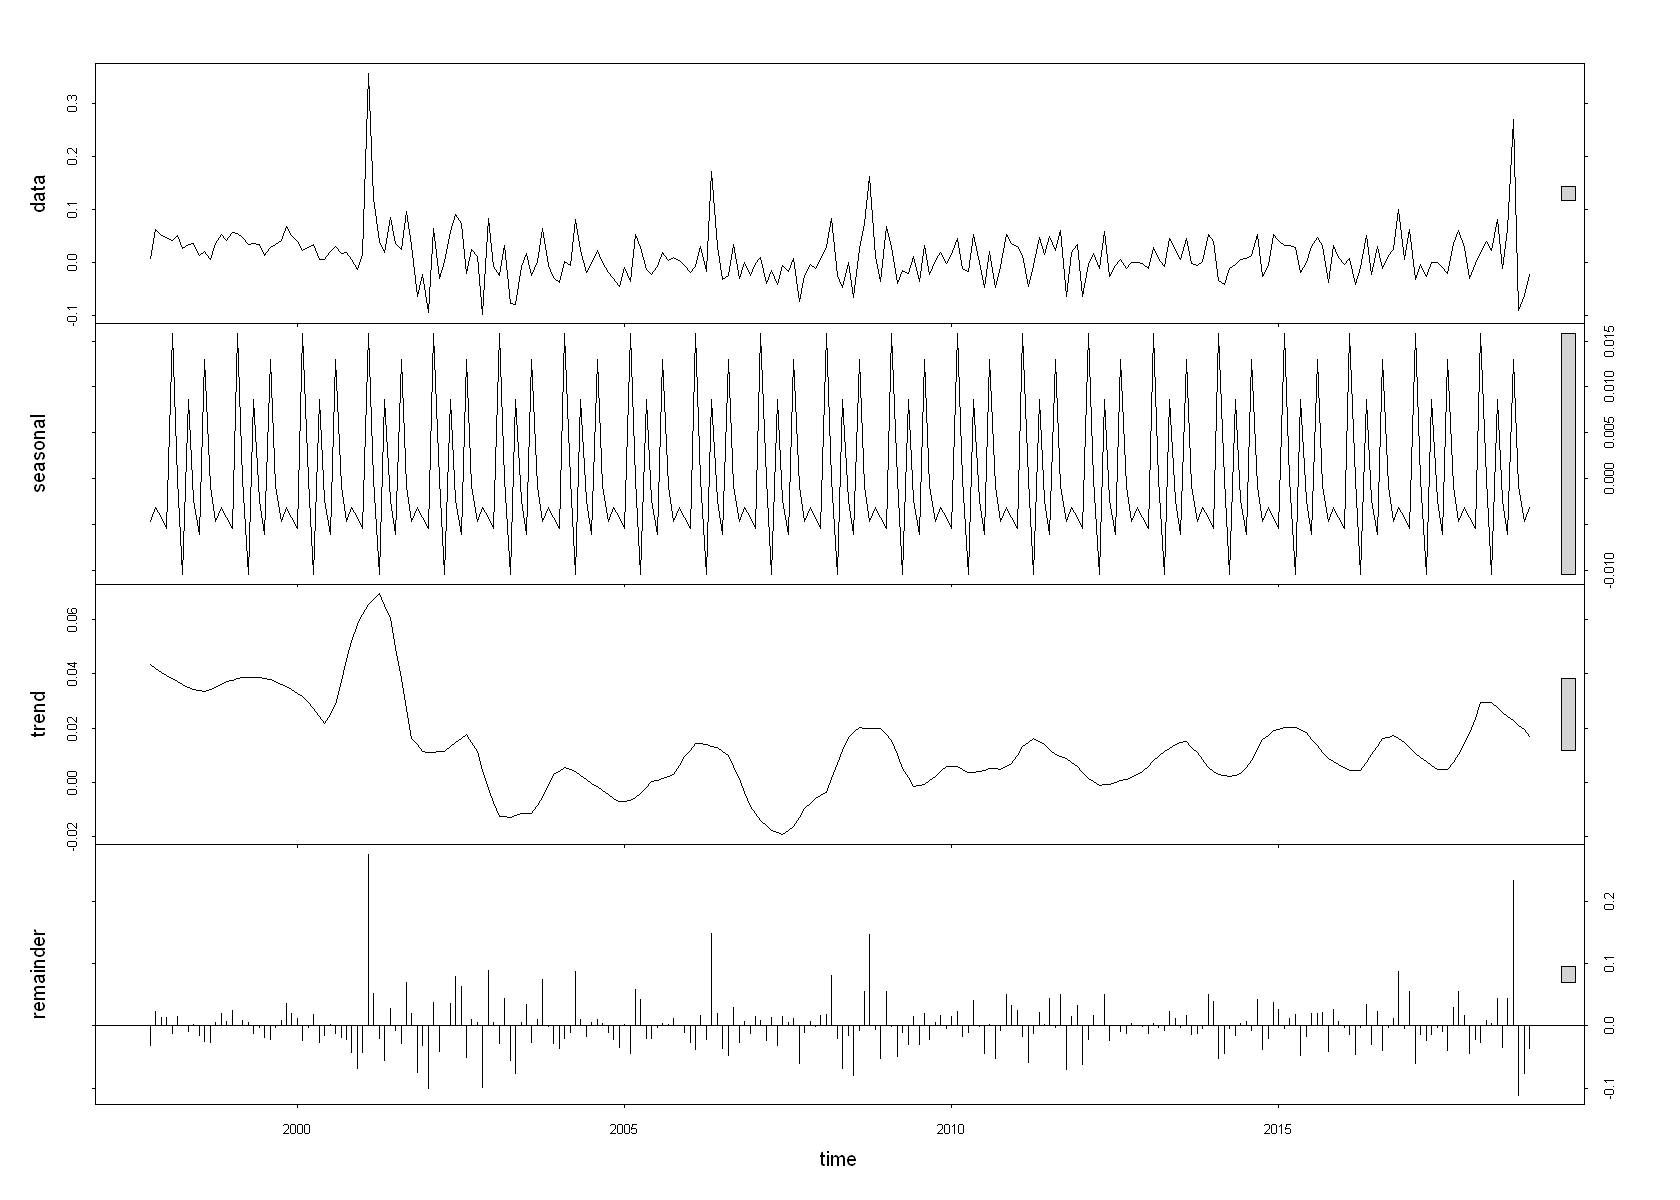

In [35]:
plot(stl( newdataset , s.window = "periodic"))

To determine the orders p and q, we will consider the autocorrelation funtion and partial one.
ACF gives to us the values of order q for MA(q). The first line which is include the region determined by blue dashline gives lag-q.

PACF determines the value of order p for AR(p).



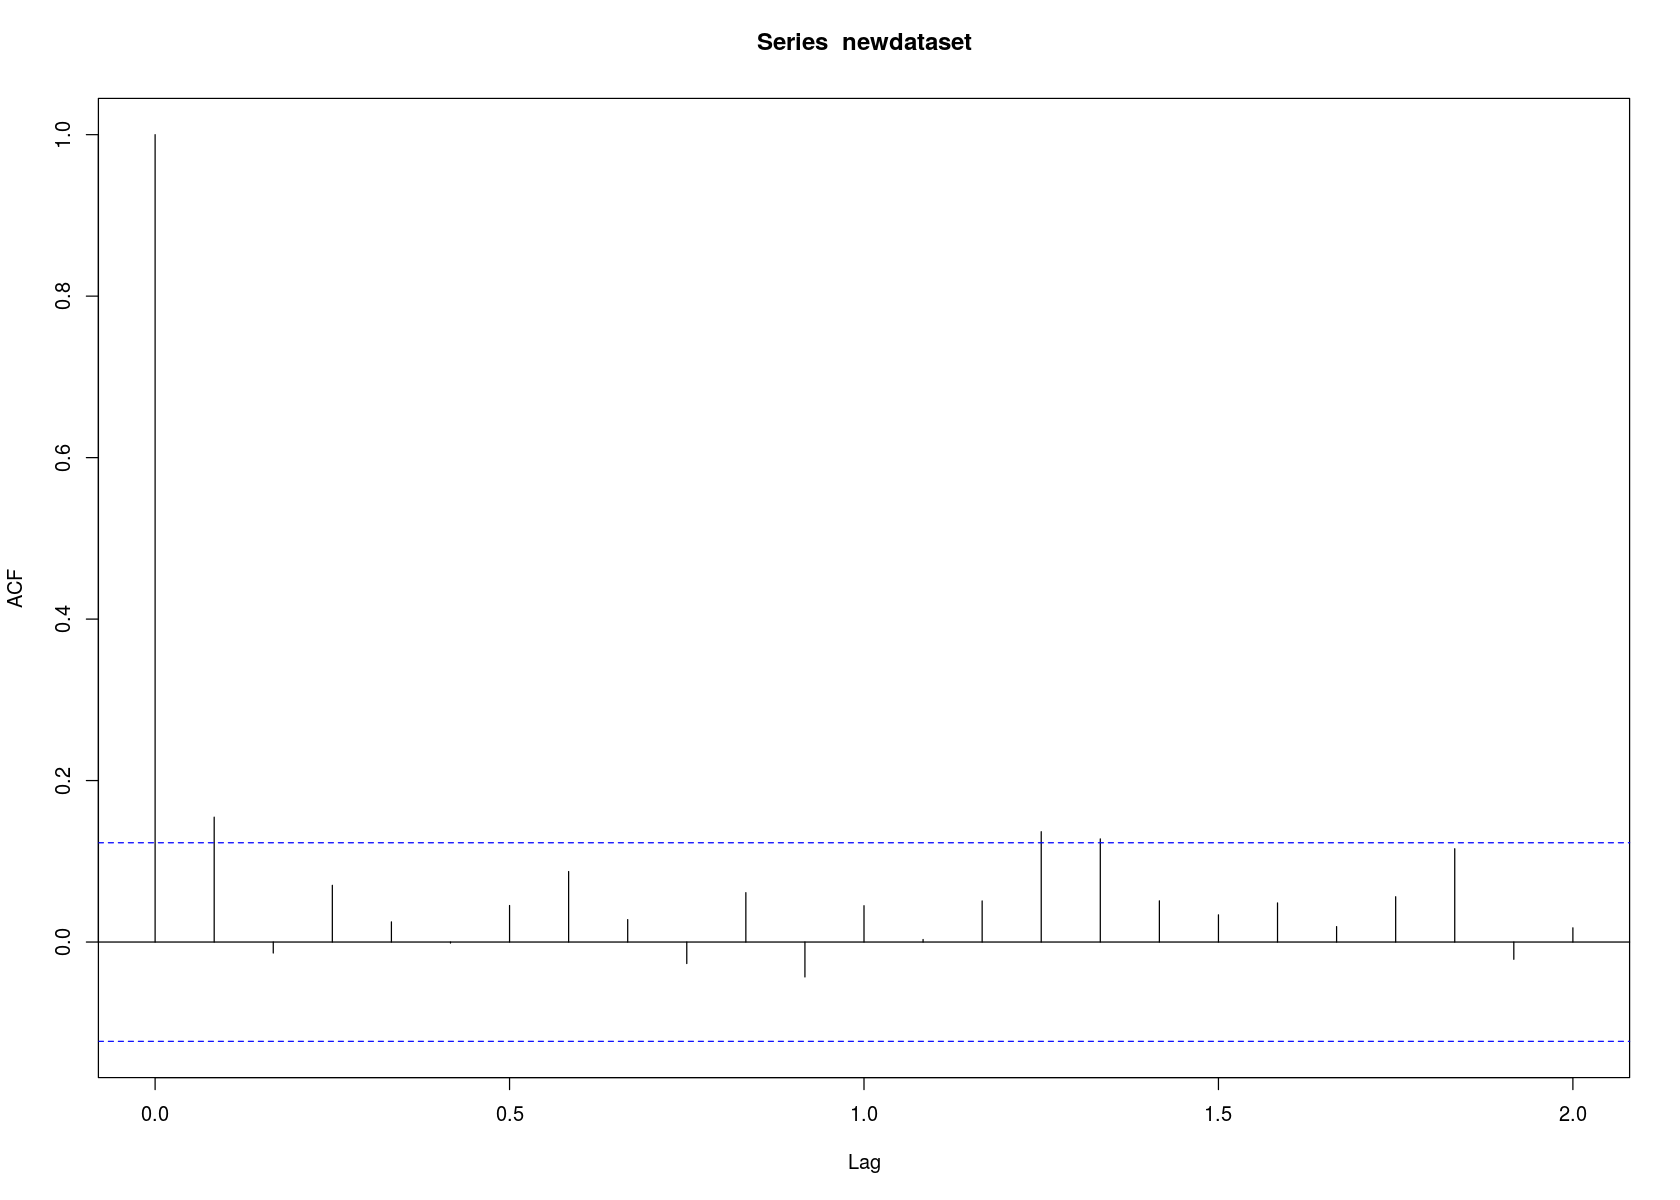

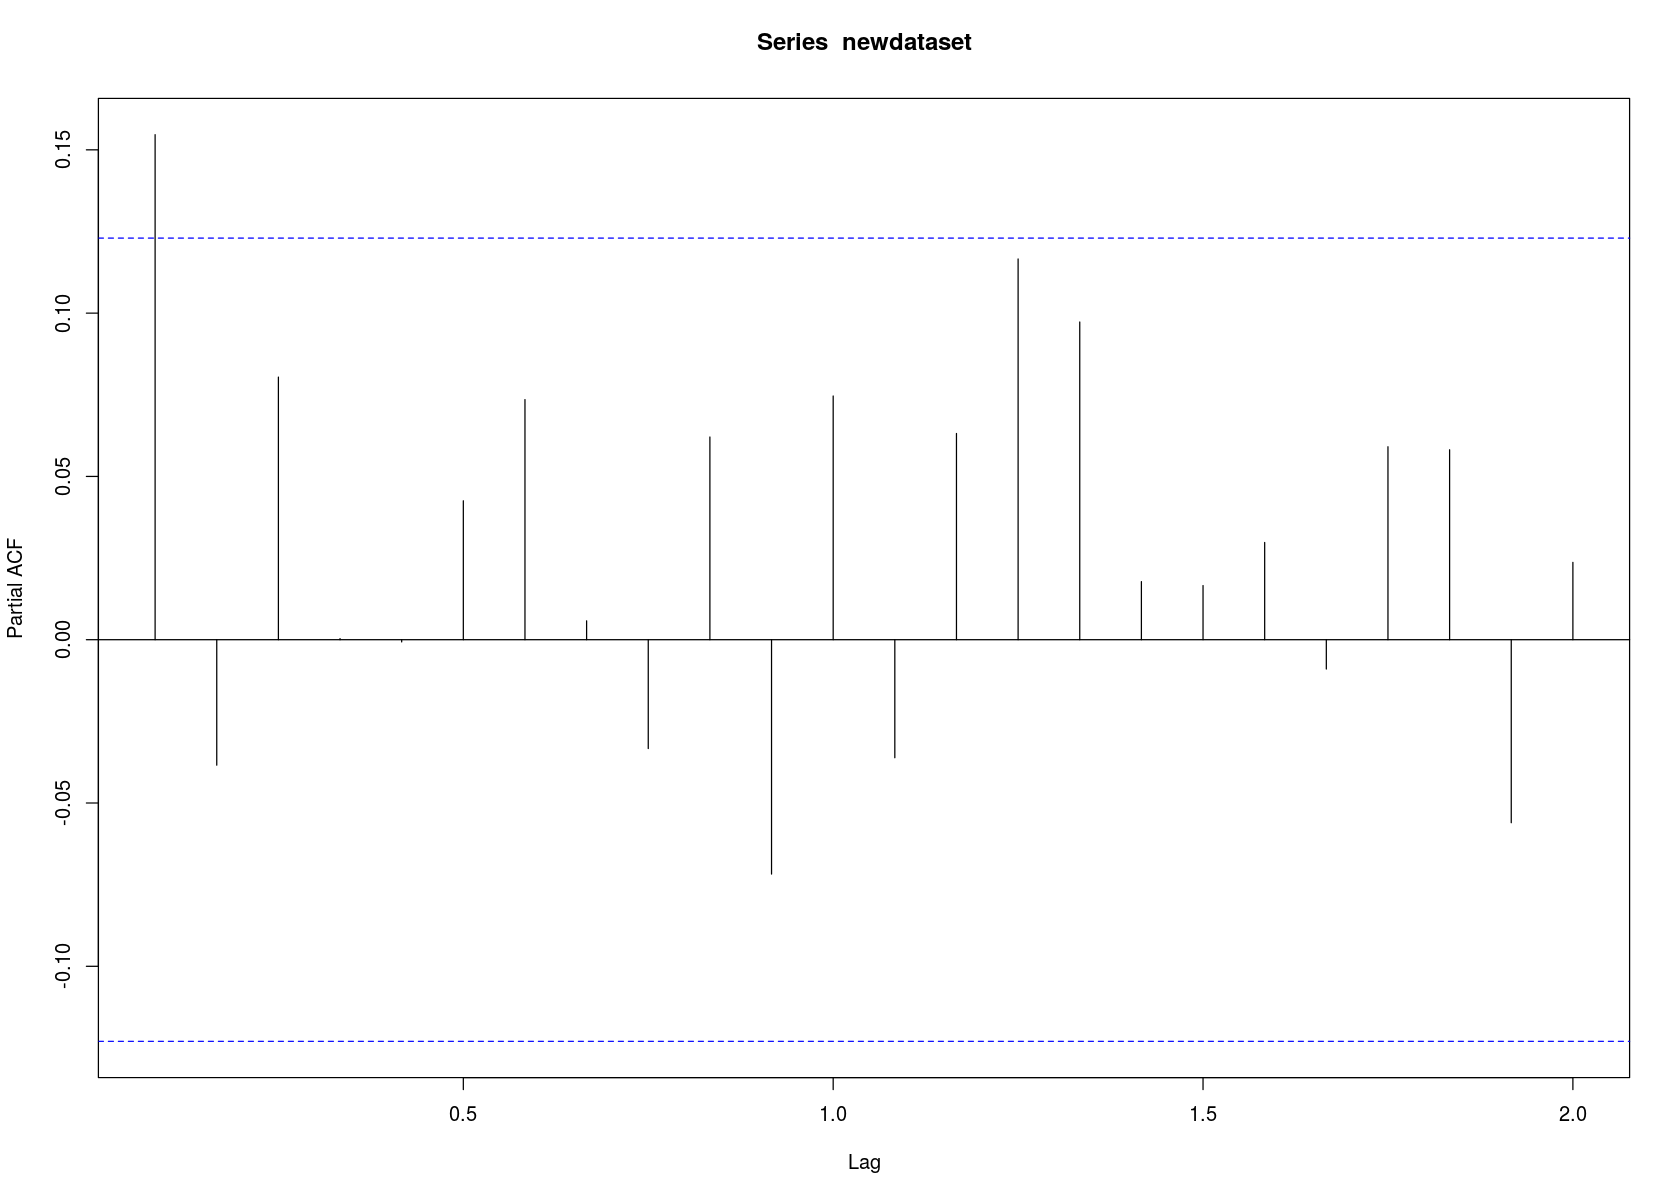

In [22]:
acf(newdataset)
pacf( newdataset )

From the above graphics, we can choose the order q = 2 and p=1 of ARIMA model.

In [23]:
fit <-arima( newdataset , c(1, 1, 2))
fit
pred <- predict(fit, n.ahead = 1*12 ) # This will predicting values for the next  year(12 mounth)
pred1 <- exp(pred$pred) # The result should be convert into   log(x)=y, x = exp(y)
pred1


Call:
arima(x = newdataset, order = c(1, 1, 2))

Coefficients:
          ar1      ma1      ma2
      -0.4275  -0.4068  -0.5331
s.e.   0.2684   0.2468   0.2342

sigma^2 estimated as 0.002174:  log likelihood = 415.36,  aic = -822.72

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2018                                                                        
2019 1.018777 1.013781 1.015914 1.015002 1.015392 1.015225 1.015296 1.015266
          Sep      Oct      Nov      Dec
2018                            1.007129
2019 1.015279 1.015273 1.015276         

Auto.arima model returns best ARIMA model according to either AIC, AICc or BIC value.
Auto ARIMA takes into account the AIC and BIC values generated (as you can see in the code) to determine the best combination of parameters. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) values are estimators to compare models. The lower these values, the better is the model.

In [21]:
library(forecast)
model <- auto.arima( newdataset )
model

Series: newdataset 
ARIMA(1,1,2) 

Coefficients:
          ar1      ma1      ma2
      -0.4275  -0.4068  -0.5331
s.e.   0.2684   0.2468   0.2342

sigma^2 estimated as 0.0022:  log likelihood=415.36
AIC=-822.72   AICc=-822.56   BIC=-808.59

In [ ]:
train <- window(newdataset,start=1997,end=c(2016,12))
test <- window(newdataset,start=c(2017,1))


In [ ]:
fit <- arima(train, c(1, 1, 2))
pred <- predict(fit, n.ahead=23 ) # This will predicting values for the next  year(12 mounth)
accuracy(pred$pred,test)
ts.plot(pred$pred,test,col=c('red','blue'))

In [ ]:
model <- HoltWinters(train,alpha = 0.01, beta = 0.01, gamma = 0.01)
pred <- forecast(model,start=c(2017,1),end=c(2018,11))
accuracy(pred$mean,test)
ts.plot(pred$mean,test,col=c('red','blue'))

In [ ]:
model <- ets(train)
pred <- forecast(model,start=c(2017,1),end=c(2018,11))
accuracy(pred$mean,test)
ts.plot(pred$mean,test,col=c('red','blue'))

## References
 * Brockwell, P. R. Davis (2016). _An introduction to Time Series and Forecasting. 3th Edition. Springer_
 * The course MTH6139 Time Series Lecturer notes in Queen Mary University of London.